In [280]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [281]:
from sklearn.datasets import load_iris

In [282]:
# Bring the dataset into the iris var
iris = load_iris()

In [283]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### Make my dataset

In [284]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [285]:
Data_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

In [286]:
Data_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [287]:
Data_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [288]:
Data_iris.shape

(150, 4)

### Adding labels into the dataframe

In [289]:
Data_iris['label'] = iris.target

In [290]:
Data_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Visualize data

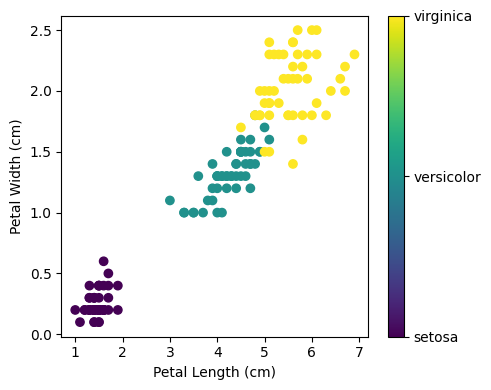

In [291]:
# Scatter plot
formatter = plt.FuncFormatter(lambda i, * args: iris.target_names[int(i)])
formatter
plt.figure(figsize=(5, 4))
plt.scatter(Data_iris.iloc[:,2], Data_iris.iloc[:,3], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format = formatter)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.tight_layout() # Adjust the padding between and around subplots
plt.show()

In [292]:
# iloc[:, 0:4] -> all rows , 0-3 columns
X = Data_iris.iloc[:, 0:4]
y = Data_iris.iloc[:, 4]

### K-NN Classification Algorithm 

In [293]:
from sklearn.neighbors import KNeighborsClassifier

In [294]:
# Train model
kNN = KNeighborsClassifier(n_neighbors=6, metric='minkowski', p=1)
kNN

KNeighborsClassifier(n_neighbors=6, p=1)

In [295]:
kNN.fit(X,y)

KNeighborsClassifier(n_neighbors=6, p=1)

In [296]:
x_New = np.array([[5.6, 3.4, 1.4, 0.1]])
x_New

array([[5.6, 3.4, 1.4, 0.1]])

In [297]:
kNN.predict(x_New)
# 0 -> is setosa category

/Users/nathalia/.pyenv/versions/py-3.10.7/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [298]:
x_New2 = np.array([[7.5, 4, 5.5, 2]])

In [299]:
kNN.predict(x_New2)
# 2 -> virginica

/Users/nathalia/.pyenv/versions/py-3.10.7/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2])

#### Splitting dataset

In [300]:

from sklearn.model_selection import train_test_split

The train_test_split() function is used to split the dataset into train and test sets. By default, the function shuffles the data (with shuffle=True) before splitting. The random state hyperparameter in the train_test_split() function controls the shuffling process.

With random_state=None , we get different train and test sets across different executions and the shuffling process is out of control.

With random_state=0 , we get the same train and test sets across different executions. With random_state=42, we get the same train and test sets across different executions, but in this time, the train and test sets are different from the previous case with random_state=0 .

- It goes for the same splitting strategy.

Stratify=True :
Suppose we have data and if that data is biased then we can have to use stratify to overcome train_test_split’s biased random sampling problem. Due to this sampling problem, the model will perform very poorly and cause problems like overfitting or underfitting. To Overcome we have to use stratify.

- Stratify makes sure that the same ratio is used in train and test dataset when splititng for each category
- It assure that the test set selects from all different labels

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8,
                                                   random_state=88, shuffle=True, stratify=y)

In [302]:
X.shape

(150, 4)

In [303]:
X_train.shape

(120, 4)

In [304]:
X_test.shape

(30, 4)

In [305]:
y_train.shape

(120,)

In [306]:
y_test.shape

(30,)

In [307]:
# n_neighbors=6 -> should be not too big neither too small
kNN2 = KNeighborsClassifier(n_neighbors=6, metric='minkowski', p=1)
kNN2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6, p=1)

In [308]:
predicted_types = kNN2.predict(X_test)
predicted_types

array([1, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 0,
       2, 0, 0, 1, 1, 0, 1, 0])

#### Model evaluation using Accuracy

In [309]:
from sklearn.metrics import accuracy_score

In [310]:
acc_KNN = accuracy_score(y_test, predicted_types)
acc_KNN

0.9666666666666667

### Decision Tree Algorithm for Classification

In [311]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [312]:
dt = DecisionTreeClassifier()

In [313]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [314]:
predicted_types_dt = dt.predict(X_test)
predicted_types_dt

array([1, 1, 2, 2, 1, 2, 1, 2, 1, 0, 1, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 0,
       2, 0, 0, 1, 1, 0, 1, 0])

#### Model evaluation

In [315]:
acc_dt = accuracy_score(y_test, predicted_types_dt)
acc_dt

1.0

#### Cross Validation in Decision Tree Model

In [316]:
from sklearn.model_selection import cross_val_score

In [317]:
# First param: model
# Second & third: dataset X, y (labels)
# Fourth : cv => number of folds (K number)
Scores_dt_cross_val = cross_val_score(dt, X, y, cv=10)

In [318]:
Scores_dt_cross_val

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

As we see, it gives 10 scores from different test sets. Because cv=K=10 folds

Now, I can get an average & this is the accuracy value of my model

### Naive Bayes Algorithm for Classification

In [319]:
from sklearn.naive_bayes import GaussianNB

In [320]:
NB = GaussianNB()

In [321]:
NB.fit(X_train, y_train)

GaussianNB()

In [322]:
predicted_types_NB = NB.predict(X_test)
predicted_types_NB

array([1, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 0,
       2, 0, 0, 1, 1, 0, 1, 0])

In [323]:
acc_NB = accuracy_score(y_test, predicted_types_NB)
acc_NB

0.9666666666666667

In [324]:
Scores_NB_cross_val = cross_val_score(NB, X, y, cv=10)

In [325]:
Scores_NB_cross_val

array([0.93333333, 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.86666667, 1.        , 1.        , 1.        ])

Having the average of the last array, I have the average score of the 10-Fold Cross-Validation for Naive Bayes model

### Logistic Regression Model for Classification

In [331]:
from sklearn.datasets import load_breast_cancer

In [332]:
cancer = load_breast_cancer()

In [333]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [334]:
Data_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [335]:
Data_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [336]:
Data_cancer.shape

(569, 30)

In [337]:
Data_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [338]:
Data_cancer['label'] = cancer.target

In [339]:
Data_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [340]:
Data_cancer.shape

(569, 31)

In [341]:
X_cancer = Data_cancer.iloc[:,0:30]
y_cancer = Data_cancer.iloc[:,30]

In [342]:
X_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [343]:
y_cancer

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64

In [344]:
# Split data
from sklearn.model_selection import train_test_split

In [345]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cancer, y_cancer, test_size=0.3, train_size=0.7,
                                                           random_state=88)

In [346]:
X_train_c.shape

(398, 30)

In [347]:
X_test_c.shape

(171, 30)

In [348]:
y_train_c.shape

(398,)

In [349]:
y_test_c.shape

(171,)

In [350]:
from sklearn.linear_model import LogisticRegression

In [351]:
Lr = LogisticRegression(max_iter=10000)

In [352]:
Lr.fit(X_train_c, y_train_c)

LogisticRegression(max_iter=10000)

In [353]:
predicted_clases_Lr = Lr.predict(X_test_c) 

In [354]:
predicted_clases_Lr

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [355]:
acc_lr = accuracy_score(y_test_c, predicted_clases_Lr)
acc_lr

0.9707602339181286

In [356]:
Scores_Lr_cross_val = cross_val_score(Lr, X_cancer, y_cancer, cv=10)

In [357]:
Scores_Lr_cross_val

array([0.98245614, 0.9122807 , 0.92982456, 0.94736842, 0.98245614,
       0.98245614, 0.92982456, 0.94736842, 0.96491228, 0.96428571])

#### Model Evaluation

In [358]:
from sklearn.metrics import confusion_matrix, classification_report

In [359]:
Conf_matrix = confusion_matrix(y_test_c, predicted_clases_Lr)

In [360]:
Class_report = classification_report(y_test_c, predicted_clases_Lr)

In [361]:
Conf_matrix

array([[ 55,   2],
       [  3, 111]])

In [362]:
Class_report

'              precision    recall  f1-score   support\n\n           0       0.95      0.96      0.96        57\n           1       0.98      0.97      0.98       114\n\n    accuracy                           0.97       171\n   macro avg       0.97      0.97      0.97       171\nweighted avg       0.97      0.97      0.97       171\n'

In [363]:
type(Class_report)

str

support column is the actual cancer and not cancer

In [364]:
from sklearn.metrics import roc_curve

In [365]:
# y_prob -> show the probability of predictinf each label
y_prob = Lr.predict_proba(X_test_c)

In [366]:
y_prob

array([[1.81551978e-04, 9.99818448e-01],
       [9.99999715e-01, 2.85263149e-07],
       [1.14638910e-04, 9.99885361e-01],
       [9.99999970e-01, 2.99028640e-08],
       [5.13203691e-04, 9.99486796e-01],
       [2.50773071e-03, 9.97492269e-01],
       [5.71986196e-01, 4.28013804e-01],
       [3.14254438e-03, 9.96857456e-01],
       [9.99999221e-01, 7.78916935e-07],
       [9.99998339e-01, 1.66061033e-06],
       [7.46536135e-04, 9.99253464e-01],
       [3.87006013e-03, 9.96129940e-01],
       [1.00000000e+00, 2.92256498e-10],
       [9.99974659e-01, 2.53410919e-05],
       [9.99913750e-01, 8.62496083e-05],
       [9.98515253e-01, 1.48474709e-03],
       [9.99371895e-01, 6.28104590e-04],
       [2.15619764e-04, 9.99784380e-01],
       [1.33572797e-03, 9.98664272e-01],
       [3.18704789e-04, 9.99681295e-01],
       [9.46528477e-05, 9.99905347e-01],
       [9.99086095e-01, 9.13904852e-04],
       [6.21058036e-01, 3.78941964e-01],
       [1.71376917e-02, 9.82862308e-01],
       [2.933877

Note that the sumation of 0, 1 probability (column) should be 1

In [367]:
y_prob = y_prob[:, 1]

In [368]:
y_prob

array([9.99818448e-01, 2.85263149e-07, 9.99885361e-01, 2.99028640e-08,
       9.99486796e-01, 9.97492269e-01, 4.28013804e-01, 9.96857456e-01,
       7.78916935e-07, 1.66061033e-06, 9.99253464e-01, 9.96129940e-01,
       2.92256498e-10, 2.53410919e-05, 8.62496083e-05, 1.48474709e-03,
       6.28104590e-04, 9.99784380e-01, 9.98664272e-01, 9.99681295e-01,
       9.99905347e-01, 9.13904852e-04, 3.78941964e-01, 9.82862308e-01,
       9.70661223e-01, 9.99767213e-01, 9.99983812e-01, 9.99205085e-01,
       9.99973063e-01, 9.03143907e-01, 2.98107070e-06, 1.07664657e-19,
       8.26826887e-01, 9.99113504e-01, 8.01850942e-01, 9.75831811e-01,
       9.77733300e-01, 9.99177157e-01, 9.97477132e-01, 9.99856377e-01,
       7.80316214e-07, 9.84535734e-01, 2.06595544e-13, 9.48493483e-01,
       2.95579596e-01, 9.80896408e-01, 9.98637221e-01, 9.77991490e-01,
       2.54349995e-03, 9.99827017e-01, 9.99176449e-01, 1.53777927e-01,
       9.98454971e-01, 8.51720889e-01, 9.98432459e-01, 9.99945612e-01,
      

In [369]:
FPR, TPR, Thresholds = roc_curve(y_test_c, y_prob)

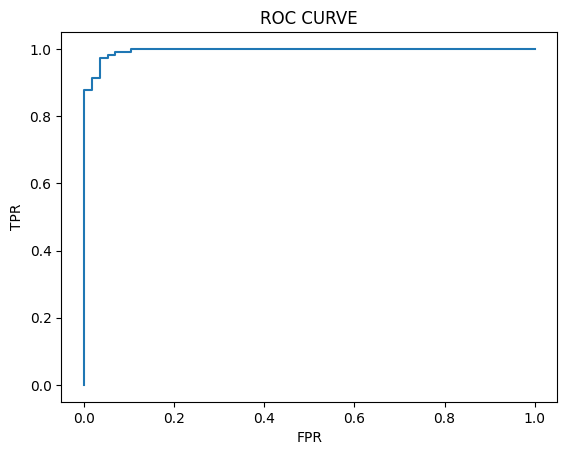

In [370]:
plt.plot(FPR, TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

It can be seen that this is a really good logistic regression model for the breast cancer classification

In [371]:
from sklearn.metrics import roc_auc_score

In [372]:
model_auc = roc_auc_score(y_test_c, y_prob)

In [373]:
model_auc

0.9952293013234841

As can be seen, it is a great model cus it has high AUC